#Question 1

In [0]:
!pip install scikit-plot

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.datasets
from sklearn import metrics
import matplotlib.pyplot as plt
from mlxtend.preprocessing import one_hot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report

## Loading dataset

In [0]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [0]:
X = breast_cancer.data
Y = breast_cancer.target

In [5]:
print(X.shape, Y.shape)

(569, 30) (569,)


In [6]:
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
data['class'] = breast_cancer.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


1    357
0    212
Name: class, dtype: int64 


['malignant' 'benign']


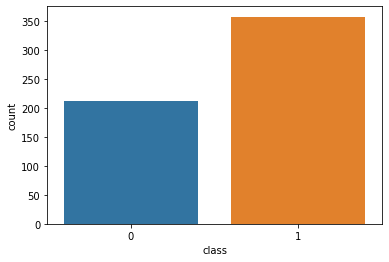

In [8]:
print(data['class'].value_counts(),"\n\n")
print(breast_cancer.target_names)
sns.countplot(data['class'])

## Train test split

In [0]:
X = data.drop('class', axis=1)
Y = data['class']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, stratify = Y, random_state=1)

In [11]:
X_train.shape, y_train.shape

((512, 30), (512,))

In [0]:
X_train = X_train.values
X_test = X_test.values

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Perceptron Class

In [0]:
class Perceptron:

  def __init__(self, learning_rate=0.01, n_iters=1000):
    self.lr = learning_rate
    self.n_iters = n_iters
    self.activation_func = self._unit_step_func
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    n_samples, n_features = X.shape

    self.weights = np.zeros(n_features)
    self.bias = 0

    accuracy = {}
    max_accuracy = 0
    wt_matrix = []

    y_ = np.array([1 if i > 0 else 0 for i in y])

    for i in range(self.n_iters):

      for idx, x_i in enumerate(X):

        linear_output = np.dot(x_i, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)

        # update rule
        update = self.lr * (y_[idx] - y_predicted)

        self.weights += update * x_i
        self.bias += update
      
      wt_matrix.append(self.weights)
      accuracy[i] = accuracy_score(self.predict(X), y)
      if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        j = i
        wt = self.weights
        bi = self.bias

    self.weights = wt
    self.bias = bi
    print("Training Accuracy :",max_accuracy,"\nAt Iteration :",j)
    #print(accuracy.values())
    
    return np.array(wt_matrix), accuracy  

  def predict(self, X):
    linear_output = np.dot(X, self.weights) + self.bias
    y_predicted = self.activation_func(linear_output)
    return y_predicted

  def _unit_step_func(self, x):
    return np.where(x>=0, 1, 0)

In [0]:
def plot_accuracy_iteration(accuracy):
  # plt.figure(figsize=(5,5))
  plt.plot(list(accuracy.values()))
  plt.title("Iteration v/s Accuracy")
  plt.xlabel('Iterations')
  plt.ylabel("Accuracy")
  # plt.ylim([0, 1])
  plt.show()

In [0]:
perceptron = Perceptron()

In [16]:
wt_matrix, accuracy = perceptron.fit(X_train, y_train)

Training Accuracy : 0.994140625 
At Iteration : 376


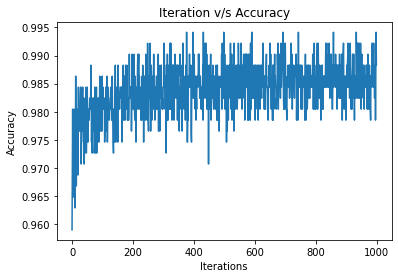

In [17]:
plot_accuracy_iteration(accuracy)

In [18]:
y_pred_test = perceptron.predict(X_test)
print('Test Accuracy :',accuracy_score(y_test, y_pred_test))

Test Accuracy : 0.9824561403508771


In [19]:
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.97      1.00      0.99        36

    accuracy                           0.98        57
   macro avg       0.99      0.98      0.98        57
weighted avg       0.98      0.98      0.98        57



#Question 2

In [0]:
import scikitplot as skplt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier 

##Loading MNIST

In [0]:
mnist = fetch_openml('mnist_784', cache=False)
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')
X /= 255.0


# y = one_hot(y, num_labels=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##MLPclassifier

In [22]:
train_acc = []
test_acc = []
h_min, h_max, h_step = 10, 100, 10

for i in np.arange(h_min, h_max+10, h_step):
  print("hidden_layer_neurons:", i)
  mlp = MLPClassifier(hidden_layer_sizes=(i,), max_iter=150, solver='sgd', random_state=1, learning_rate_init=.1)
  mlp.fit(X_train, y_train)
  train_score = mlp.score(X_train, y_train)
  test_score = mlp.score(X_test, y_test)
  print("Training set score:" , train_score)
  print("Test set score:",  test_score)
  train_acc.append(train_score)
  test_acc.append(test_score)
  print()

hidden_layer_neurons: 10
Training set score: 0.9499619047619048
Test set score: 0.9179428571428572

hidden_layer_neurons: 20
Training set score: 0.9799238095238095
Test set score: 0.9435428571428571

hidden_layer_neurons: 30
Training set score: 0.9837904761904762
Test set score: 0.9504571428571429

hidden_layer_neurons: 40
Training set score: 0.9840952380952381
Test set score: 0.9549142857142857

hidden_layer_neurons: 50
Training set score: 0.9825904761904762
Test set score: 0.9529142857142857

hidden_layer_neurons: 60
Training set score: 0.9844190476190476
Test set score: 0.9541142857142857

hidden_layer_neurons: 70
Training set score: 0.9835428571428572
Test set score: 0.9559428571428571

hidden_layer_neurons: 80
Training set score: 0.9833142857142857
Test set score: 0.9550857142857143

hidden_layer_neurons: 90
Training set score: 0.9854285714285714
Test set score: 0.9596571428571429

hidden_layer_neurons: 100
Training set score: 0.9793142857142857
Test set score: 0.9573142857142857


In [23]:
score_df = pd.DataFrame(index=np.arange(1,(h_max+10)/10,1,dtype=int))
score_df["h_neurons"] = np.arange(h_min, h_max+10, h_step)
score_df["train_acc"] = train_acc
score_df['test_acc'] = test_acc
from tabulate import tabulate
print(tabulate(score_df, headers='keys', tablefmt='pretty'))

+----+-----------+--------------------+--------------------+
|    | h_neurons |     train_acc      |      test_acc      |
+----+-----------+--------------------+--------------------+
| 1  |   10.0    | 0.9499619047619048 | 0.9179428571428572 |
| 2  |   20.0    | 0.9799238095238095 | 0.9435428571428571 |
| 3  |   30.0    | 0.9837904761904762 | 0.9504571428571429 |
| 4  |   40.0    | 0.9840952380952381 | 0.9549142857142857 |
| 5  |   50.0    | 0.9825904761904762 | 0.9529142857142857 |
| 6  |   60.0    | 0.9844190476190476 | 0.9541142857142857 |
| 7  |   70.0    | 0.9835428571428572 | 0.9559428571428571 |
| 8  |   80.0    | 0.9833142857142857 | 0.9550857142857143 |
| 9  |   90.0    | 0.9854285714285714 | 0.9596571428571429 |
| 10 |   100.0   | 0.9793142857142857 | 0.9573142857142857 |
+----+-----------+--------------------+--------------------+


In [0]:
mlp = MLPClassifier(hidden_layer_sizes=(90,), max_iter=150, solver='sgd', random_state=1, learning_rate_init=.1, verbose=True)

In [25]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.32186642
Iteration 2, loss = 0.24430603
Iteration 3, loss = 0.24441268
Iteration 4, loss = 0.20915267
Iteration 5, loss = 0.22763426
Iteration 6, loss = 0.32300439
Iteration 7, loss = 0.33071008
Iteration 8, loss = 0.30655973
Iteration 9, loss = inf
Iteration 10, loss = 0.23090285
Iteration 11, loss = 0.22189226
Iteration 12, loss = inf
Iteration 13, loss = 0.22666103
Iteration 14, loss = 0.25718870
Iteration 15, loss = 0.20620249
Iteration 16, loss = 0.23556899
Iteration 17, loss = inf
Iteration 18, loss = 0.26119628
Iteration 19, loss = 0.39186154
Iteration 20, loss = inf
Iteration 21, loss = 0.36152072
Iteration 22, loss = 0.35635157
Iteration 23, loss = 0.42675729
Iteration 24, loss = 0.41627053
Iteration 25, loss = inf
Iteration 26, loss = inf
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(90,), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=150, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [26]:
print("Training set score:" , mlp.score(X_train, y_train))
print("Test set score:",  mlp.score(X_test, y_test))

Training set score: 0.9854285714285714
Test set score: 0.9596571428571429


In [27]:
mlp.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
mlp.n_outputs_

10

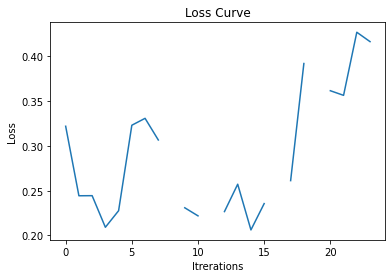

In [29]:
plt.xlabel('Itrerations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.plot(mlp.loss_curve_)
plt.show()

In [30]:
print(classification_report(y_test, mlp.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1714
           1       0.97      0.99      0.98      1977
           2       0.94      0.97      0.95      1761
           3       0.98      0.93      0.96      1806
           4       0.97      0.96      0.96      1587
           5       0.95      0.96      0.96      1607
           6       0.96      0.98      0.97      1761
           7       0.96      0.95      0.95      1878
           8       0.96      0.93      0.94      1657
           9       0.92      0.96      0.94      1752

    accuracy                           0.96     17500
   macro avg       0.96      0.96      0.96     17500
weighted avg       0.96      0.96      0.96     17500



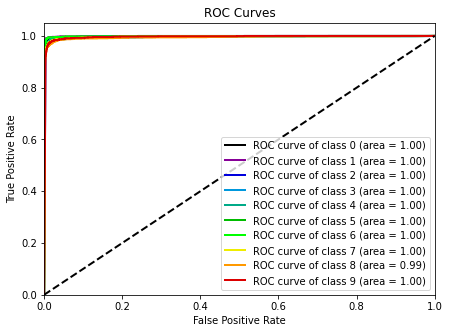

In [31]:
y_probas = mlp.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas,plot_macro=False, plot_micro=False, figsize=(7,5))
plt.show()